# Vehicle Dataset analysis using python

##### Now let’s start the task of analyzing the reach of my Instagram account by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##### Let’s have a look at the insights of the columns to understand the data type of all the columns

In [3]:
df.shape

(301, 9)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.00,2013.63,2.89,2003.00,2012.00,2014.00,2016.00,2018.00
Selling_Price,301.00,4.66,5.08,0.10,0.90,3.60,6.00,35.00
Present_Price,301.00,7.63,8.64,0.32,1.20,6.40,9.90,92.60
Kms_Driven,301.00,36947.21,38886.88,500.00,15000.00,32000.00,48767.00,500000.00
Owner,301.00,0.04,0.25,0.00,0.00,0.00,0.00,3.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Before starting everything, let’s have a look at whether this dataset contains any null values or not:

In [6]:
df.isnull().mean()*100

Car_Name        0.00
Year            0.00
Selling_Price   0.00
Present_Price   0.00
Kms_Driven      0.00
Fuel_Type       0.00
Seller_Type     0.00
Transmission    0.00
Owner           0.00
dtype: float64

In [7]:
df.duplicated().sum()

2

In [8]:
df.drop_duplicates(inplace=True)

#### Now I am performing some EDA on dataset

#### converting object data to numeric

In [9]:
le=LabelEncoder()

In [10]:
df['Car_Name']=le.fit_transform(df['Car_Name'])

In [11]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

In [12]:
df['Seller_Type']=le.fit_transform(df['Seller_Type'])

In [13]:
df['Transmission']=le.fit_transform(df['Transmission'])

#### data visualisation

##### is there any drop in price of car?

In [14]:
(df['Selling_Price']>df['Present_Price']).sum()

0

###### it is good, there is no pricedrop

#### group each type of care and sort it by high  Price

In [15]:
df.groupby(['Car_Name'])['Present_Price','Selling_Price'].mean().sort_values(by='Selling_Price',ascending=False).T

Car_Name,88,81,86,72,74,95,68,69,71,76,...,21,50,33,36,19,18,24,29,3,10
Present_Price,92.60,30.74,17.85,13.60,14.79,9.83,9.76,11.79,17.58,9.39,...,0.57,0.58,0.58,0.51,0.65,0.79,0.75,0.57,0.32,0.57
Selling_Price,35.00,18.25,12.78,11.80,11.60,9.25,7.47,7.42,7.18,6.58,...,0.25,0.25,0.21,0.21,0.20,0.20,0.20,0.20,0.18,0.17


In [16]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

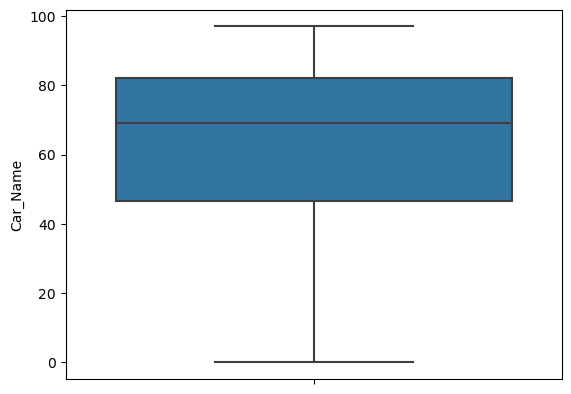

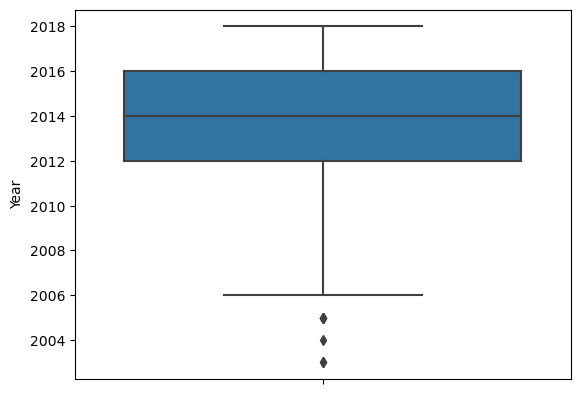

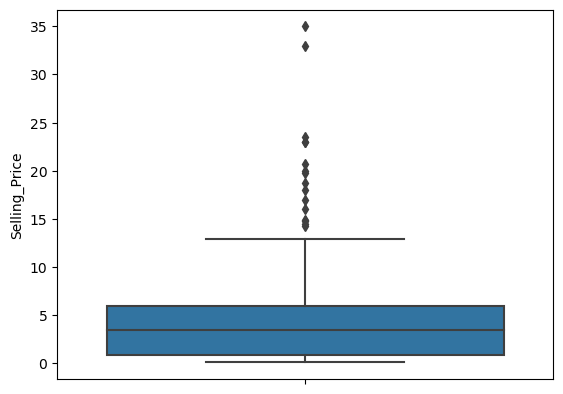

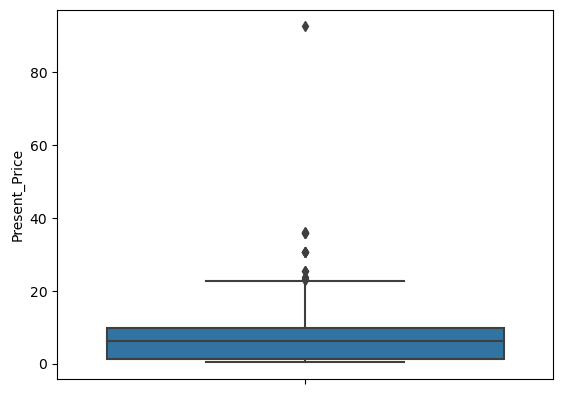

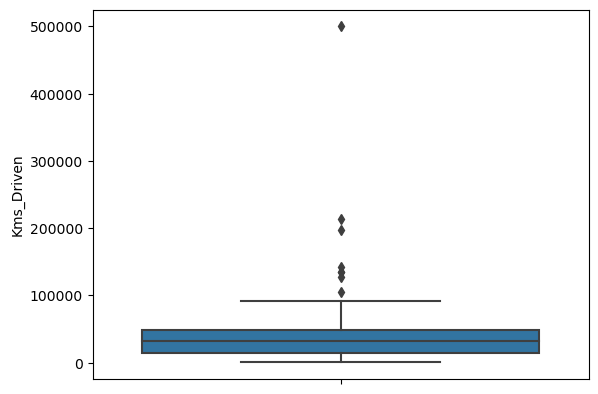

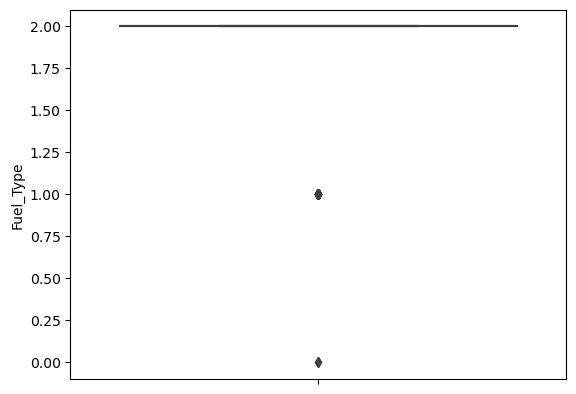

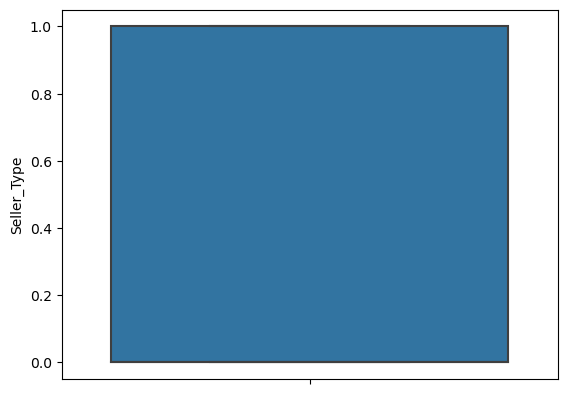

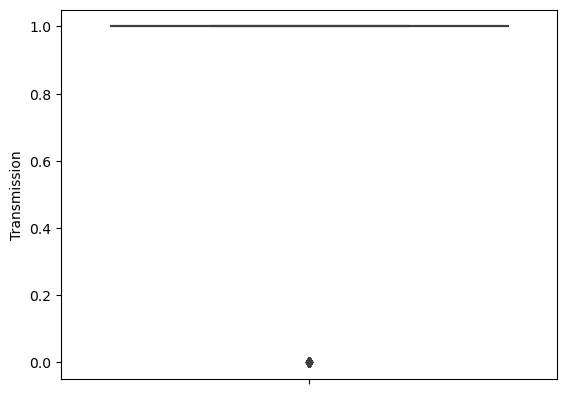

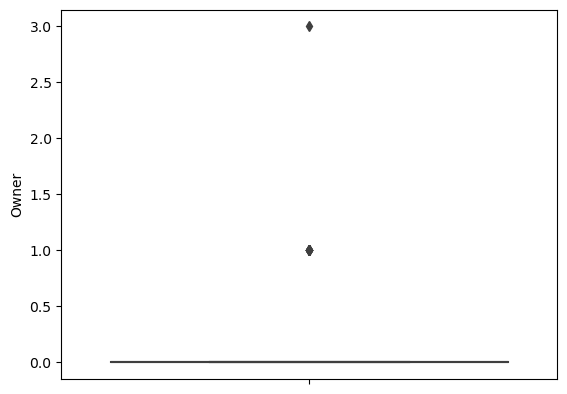

In [17]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [19]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

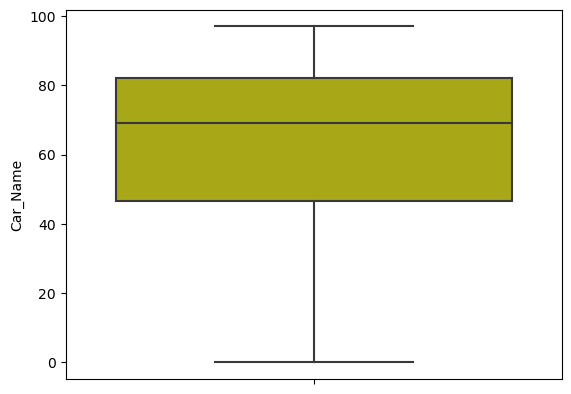

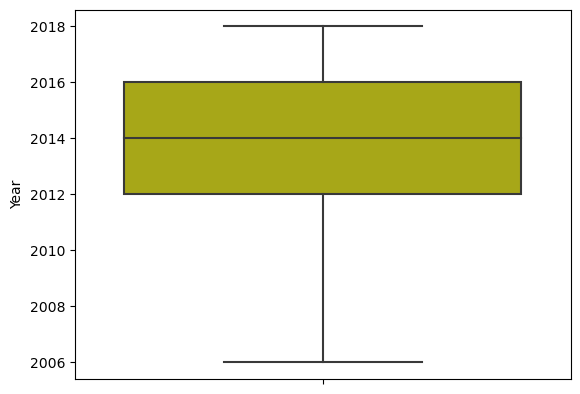

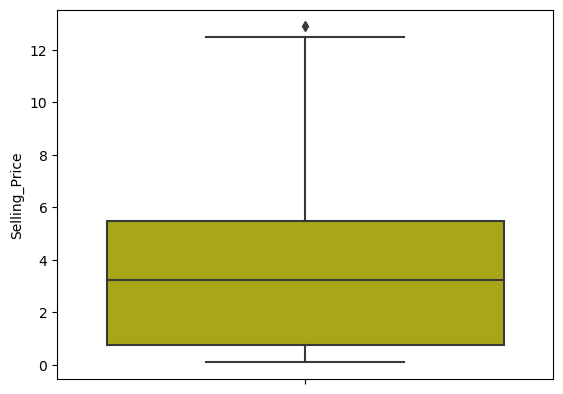

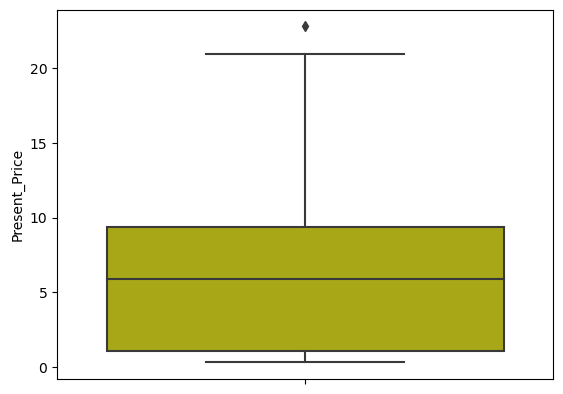

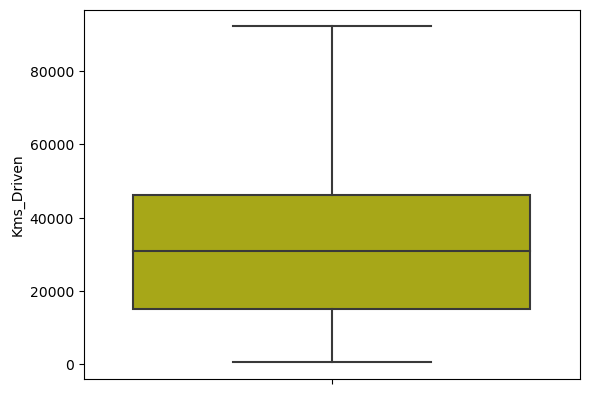

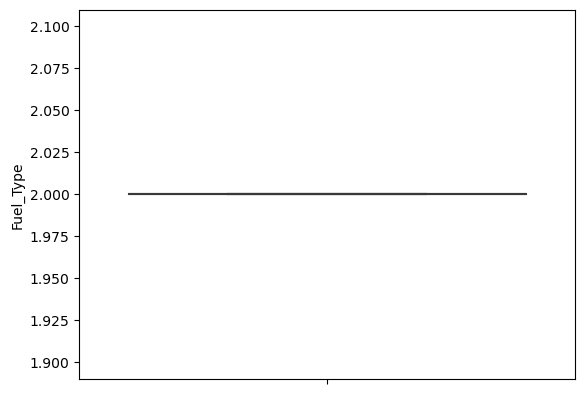

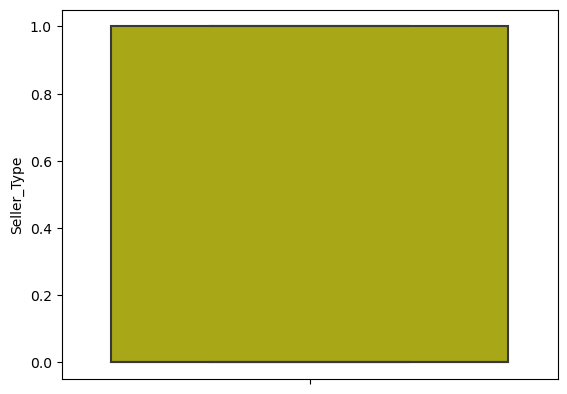

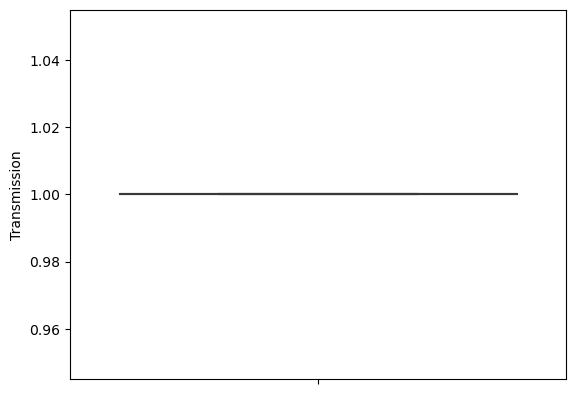

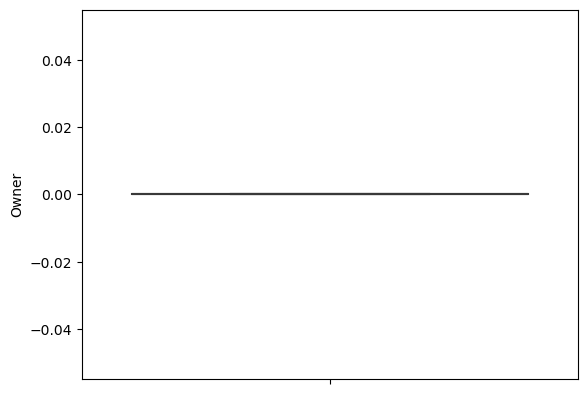

In [20]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='y')
        plt.show()

In [21]:
df.isnull().sum()

Car_Name          0
Year              7
Selling_Price    16
Present_Price    14
Kms_Driven        8
Fuel_Type        60
Seller_Type       0
Transmission     39
Owner            11
dtype: int64

In [22]:
df.dropna(inplace=True)

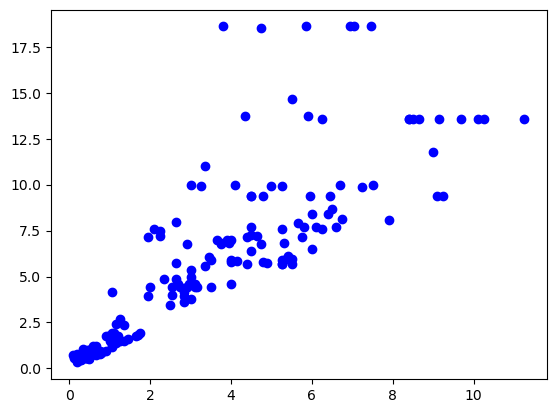

In [23]:
plt.scatter(x=df['Selling_Price'],y=df['Present_Price'],color='blue')
plt.show()

#### the is positive correlations between the selling price and the present price.

### correlation between features

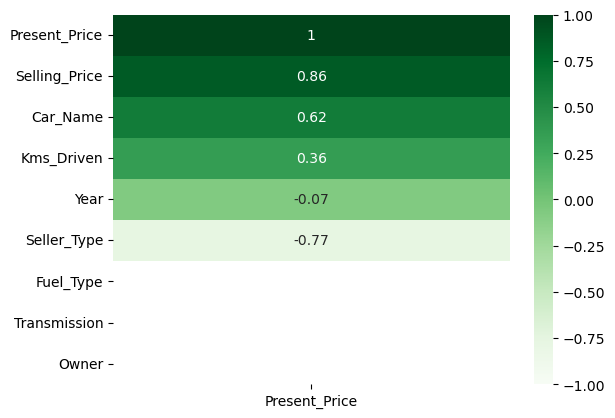

In [24]:
sns.heatmap(df.corr()[["Present_Price"]].sort_values(by="Present_Price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

# Modelling

In [25]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [26]:
x=df[['Selling_Price','Car_Name']].values

In [27]:
y=df[['Present_Price']].values

In [28]:
sc=StandardScaler()

In [29]:
x=sc.fit_transform(x)

##### Crossvalidation

In [30]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [31]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.9050352104355028
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.905611296036443
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  1.7322020239836078
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1.7512274763003461
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.2802062798685798
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.7137009926324205
*******************************************

### Choosing Ridge as the Regressor

#### splitting

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Model Prediction

In [33]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),

}

In [34]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score =model.score(x_train, y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print('*'*100)

model trained with LinearRegression
r2score: 60.88990245268964
training_score: 77.67125912687631
testing_score: 60.88990245268964
mae: 1.7280352890812833
mse: 10.230125942866895
rmse_test: 3.1984568064719734
****************************************************************************************************
model trained with Ridge
r2score: 60.820272244284766
training_score: 77.6672570185776
testing_score: 60.820272244284766
mae: 1.732529907292173
mse: 10.248339290469728
rmse_test: 3.201302748955451
****************************************************************************************************
model trained with LinearSVR
r2score: 53.688972750573406
training_score: 75.39843007868723
testing_score: 53.688972750573406
mae: 1.862688479491067
mse: 12.113691118567823
rmse_test: 3.480472829741359
****************************************************************************************************
model trained with Lasso
r2score: 52.47097953697939
training_score: 71.94443585542354
testin

#### model accuracy

In [35]:
model=GradientBoostingRegressor()

In [36]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [39]:
training_score=model.score(x_train,y_train)
training_score

0.9950820580798114

In [ ]:
y_pred = model.predict(x)

In [ ]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

In [ ]:
plt.figure(figsize=(18,4))
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.show()